In [23]:
# import libs

import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('./data/healthcare_dataset.csv')
print(f'\nDataset shape is {df.shape}\n')
df.head(10).style.set_properties(
    **{"background-color": "#4B0082", "color": "white", "border": "1.5px  solid black"})


Dataset shape is (10000, 15)



,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [25]:
df.describe(include=object).style.set_properties(
    **{"background-color": "#4B0082", "color": "white", "border": "1.5px  solid black"})

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [26]:
df.describe().T.style.set_properties(
    **{"background-color": "#4B0082", "color": "white", "border": "1.5px  solid black"})

,count,mean,std,min,25%,50%,75%,max
Age,10000.000000,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing Amount,10000.000000,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.000000,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000


In [27]:
print('Null Values of the Dataset :')
df.isna().sum().to_frame().T.style.set_properties(
    **{"background-color": "#4B0082", "color": "white", "border": "1.5px  solid black"})

Null Values of the Dataset :


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<span style="font-size:1em;">Dataset has no NULL Values</span>


In [28]:
dup_df = df[df.duplicated()].shape[0]
print(
    f"There are {dup_df} duplicate entries among {df.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 10000 entries in anime dataset.


In [29]:
print("Data types:\n")
df.dtypes

Data types:



Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

<h1 style="color: #4B0082;">Exploratory Data Analysis</h1>


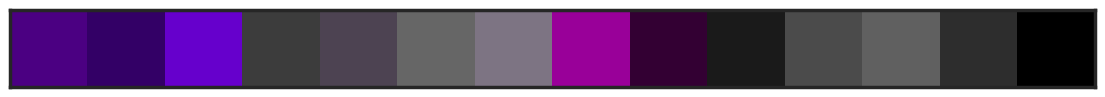

In [30]:
sns.set_style("white")
sns.set_context("poster", font_scale=.7)

palette = ['#4B0082',
           '#330066',
           '#6600CC',
           '#3C3C3C',
           '#4D4352',
           '#666666',
           '#7D7483',
           '#990099',
           '#330033',
           '#1A1A1A',
           '#4B4B4B',
           '#606060',
           '#2D2D2D',
           '#000000']

sns.palplot(sns.color_palette(palette))
plt.show()

4925 5075


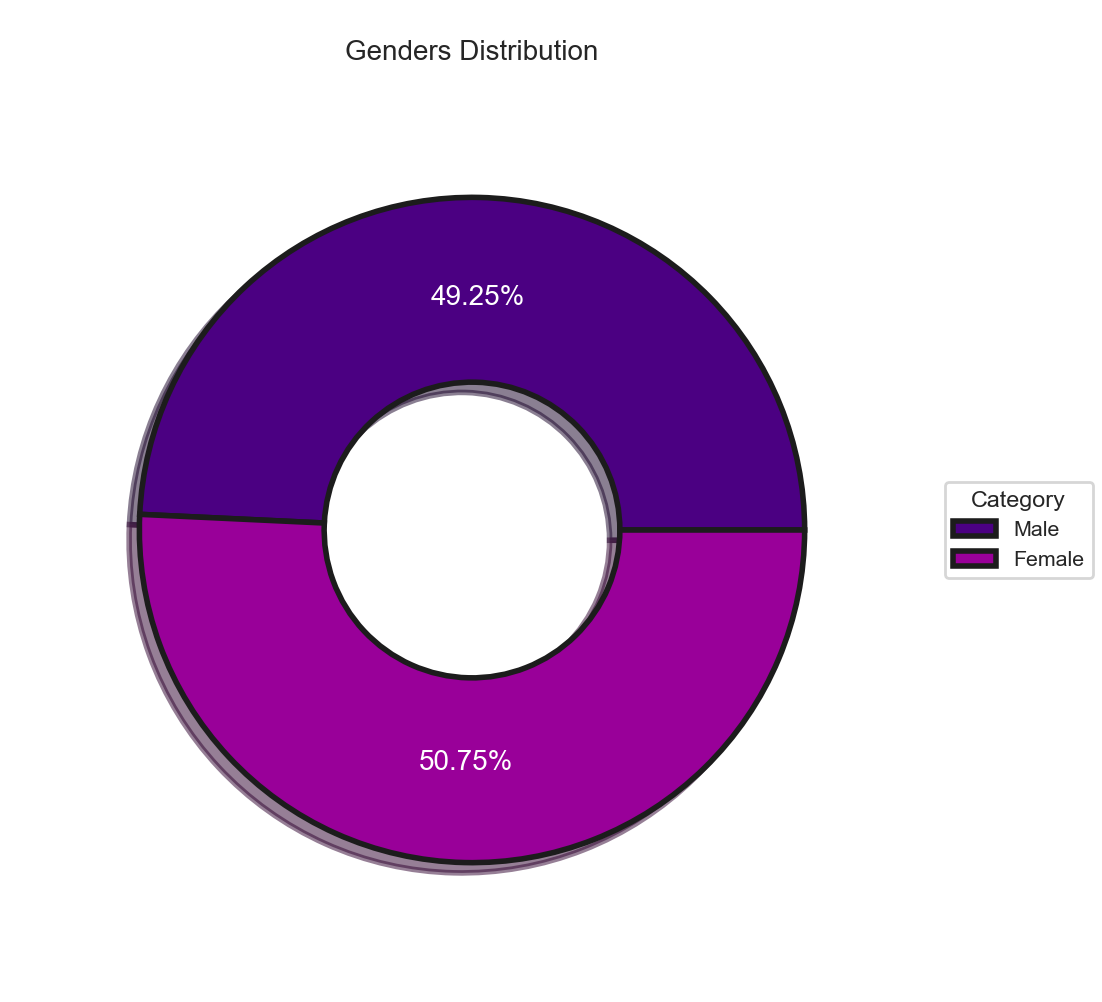

In [31]:
plt.subplots(figsize=(12, 12))

labels = "Male", "Female"
size = 0.5
wedges, texts, autotexts = plt.pie([len(df[df["Gender"] == "Male"]["Gender"]),
                                    len(df[df["Gender"] == "Female"]["Gender"])],
                                   explode=(0, 0),
                                   textprops=dict(size=20, color="white"),
                                   autopct="%.2f%%",
                                   pctdistance=0.7,
                                   radius=.9,
                                   colors=[palette[0], palette[7]],
                                   shadow=True,
                                   wedgeprops=dict(width=size, edgecolor="#1c1c1c",
                                                   linewidth=4),
                                   startangle=0)

print(len(df[df["Gender"] == "Male"]["Gender"]),
      len(df[df["Gender"] == "Female"]["Gender"]))

plt.legend(wedges, labels, title="Category",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nGenders Distribution", fontsize=20)
plt.show()

0        Diabetes
1          Asthma
2         Obesity
3          Asthma
4       Arthritis
          ...    
9995      Obesity
9996    Arthritis
9997    Arthritis
9998    Arthritis
9999    Arthritis
Name: Medical Condition, Length: 10000, dtype: object Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


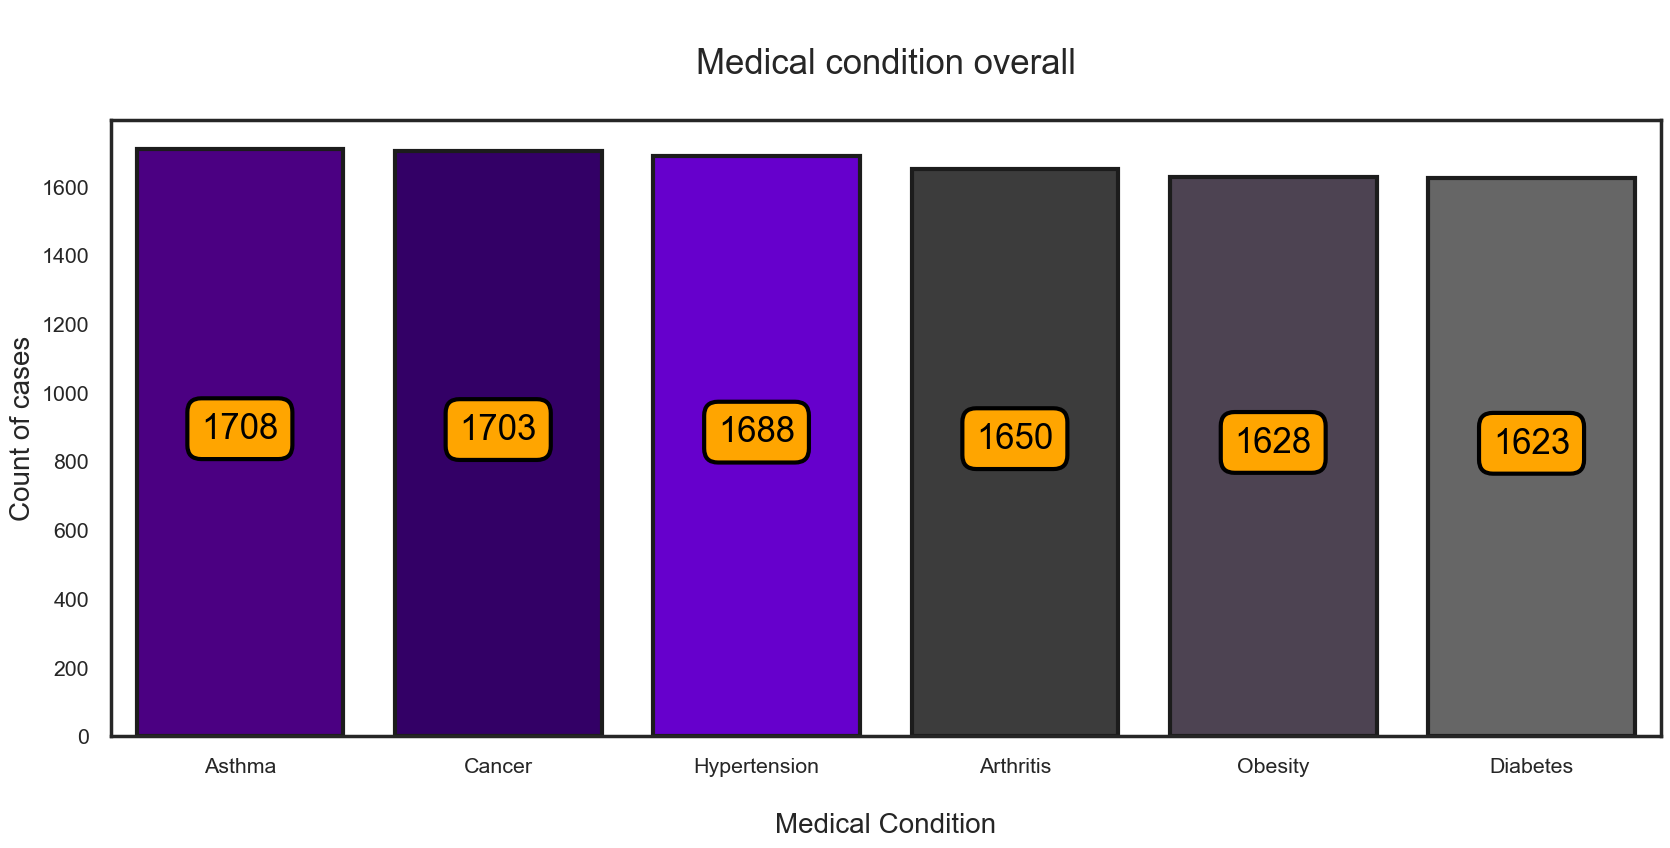

In [32]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Medical Condition"], order=df["Medical Condition"].value_counts(
).index, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.axes.set_title("\nMedical condition overall\n", fontsize=25)
plt.ylabel("Count of cases", fontsize=20)
plt.xlabel("\nMedical Condition", fontsize=20)
plt.xticks(rotation=0)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=10, size=25, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth": 3, "alpha": 1})

print(df["Medical Condition"], df["Medical Condition"].value_counts())

plt.show()

In [33]:
def blood_types():
    blood_types = df["Blood Type"].value_counts().to_dict()
    return blood_types


blood_types = blood_types()
blood_types

{'AB-': 1275,
 'AB+': 1258,
 'B-': 1252,
 'O+': 1248,
 'O-': 1244,
 'B+': 1244,
 'A+': 1241,
 'A-': 1238}

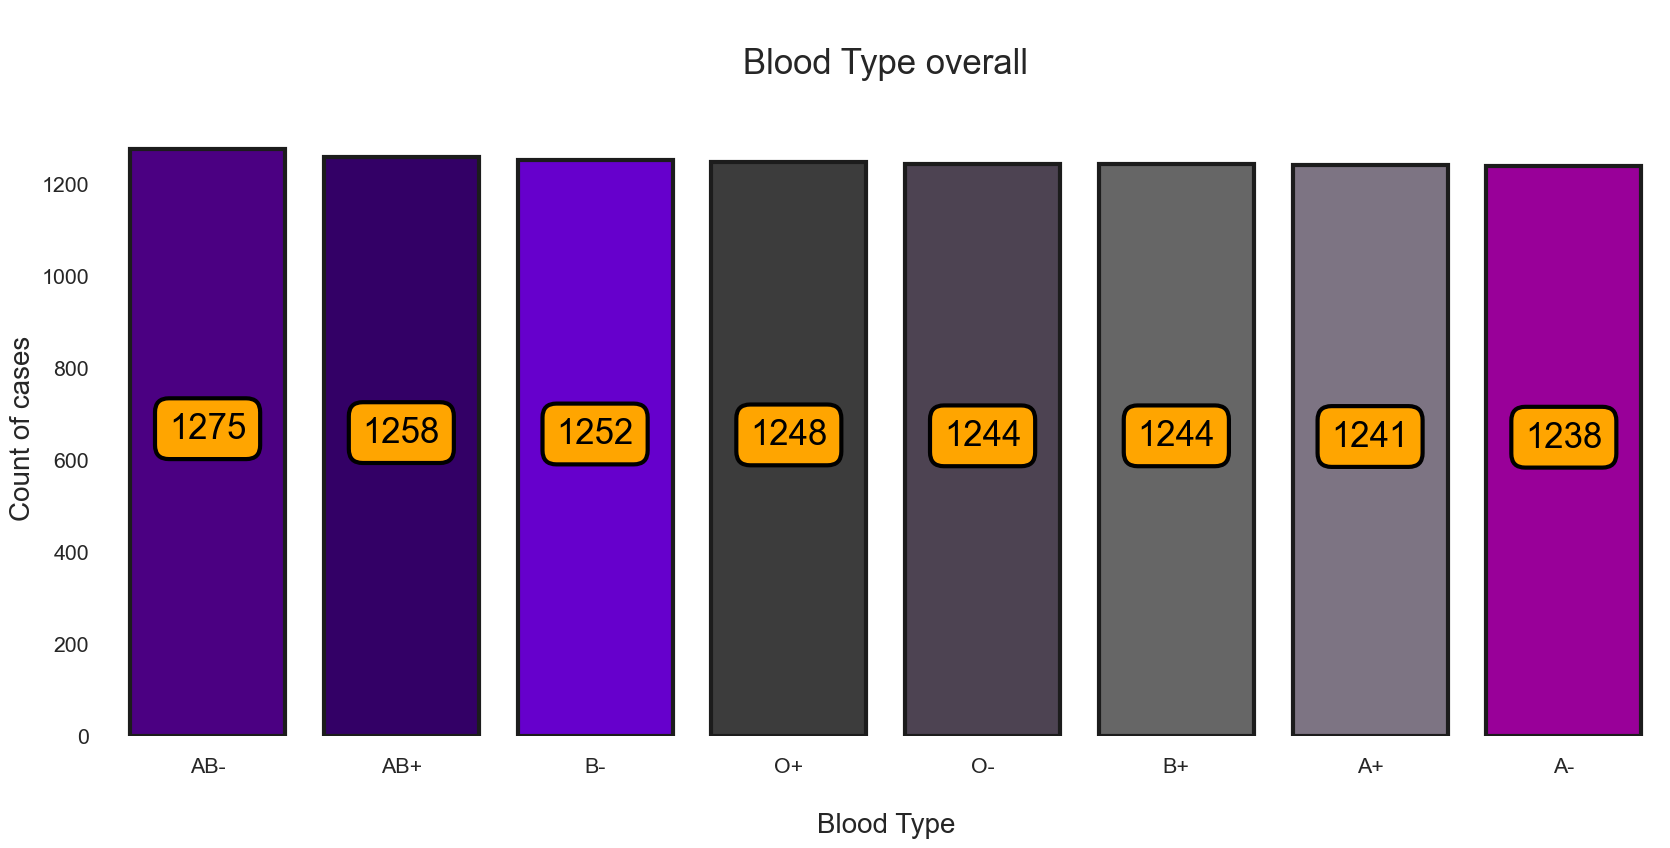

In [34]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Blood Type"], order=df["Blood Type"].value_counts(
).index, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.axes.set_title("\nBlood Type overall\n", fontsize=25)
plt.ylabel("Count of cases", fontsize=20)
plt.xlabel("\nBlood Type", fontsize=20)
plt.xticks(rotation=0)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=10, size=25, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth": 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

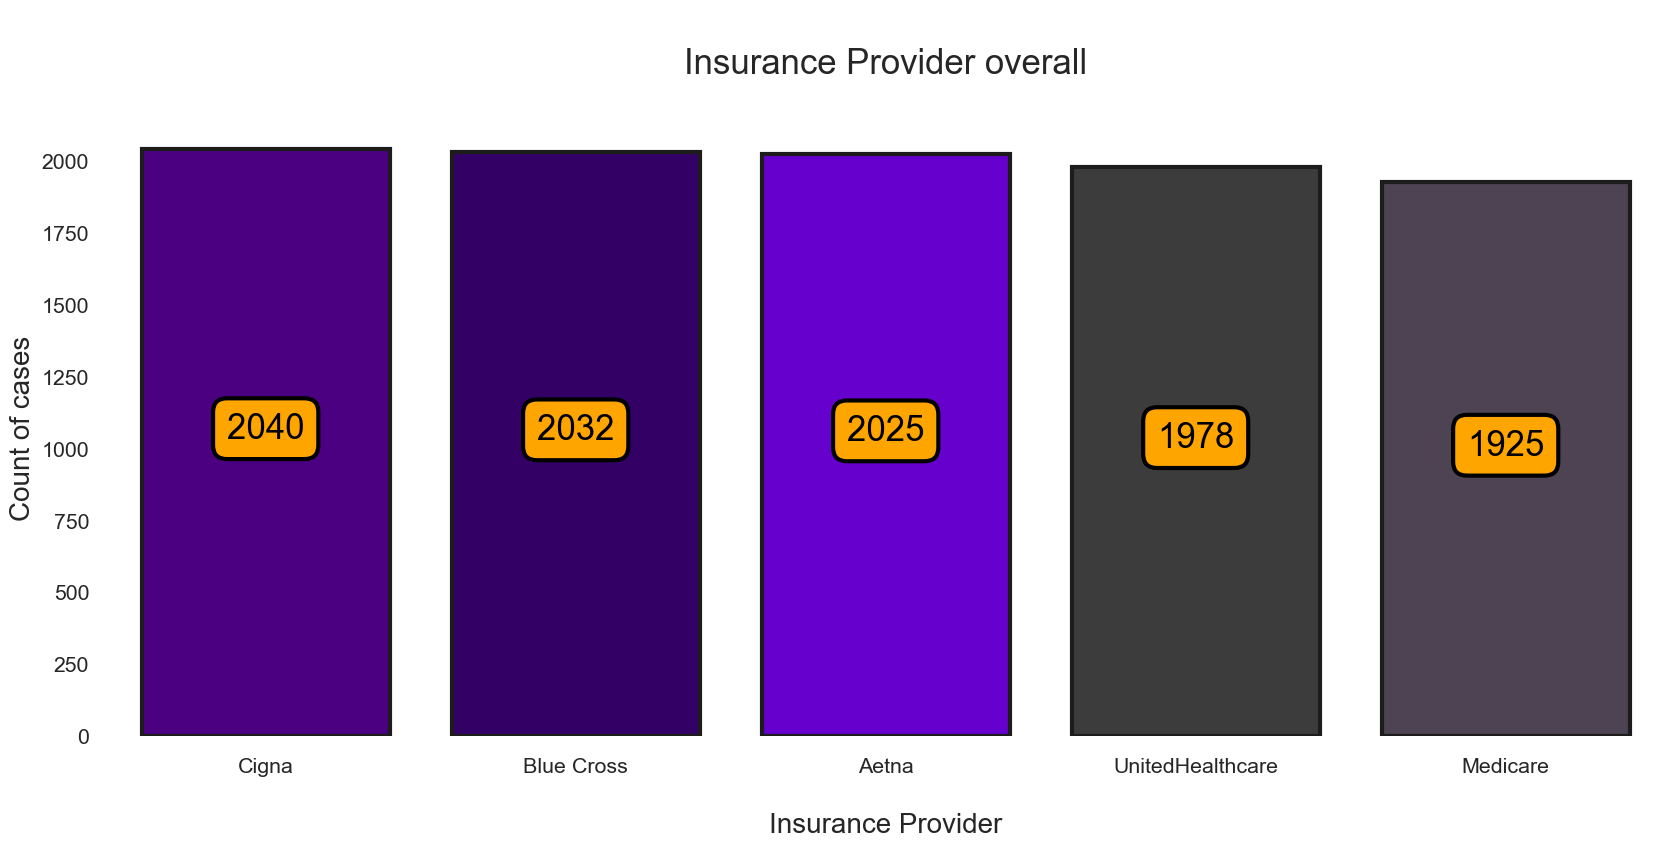

In [35]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Insurance Provider"], order=df["Insurance Provider"].value_counts(
).index, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.axes.set_title("\nInsurance Provider overall\n", fontsize=25)
plt.ylabel("Count of cases", fontsize=20)
plt.xlabel("\nInsurance Provider", fontsize=20)
plt.xticks(rotation=0)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=10, size=25, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth": 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

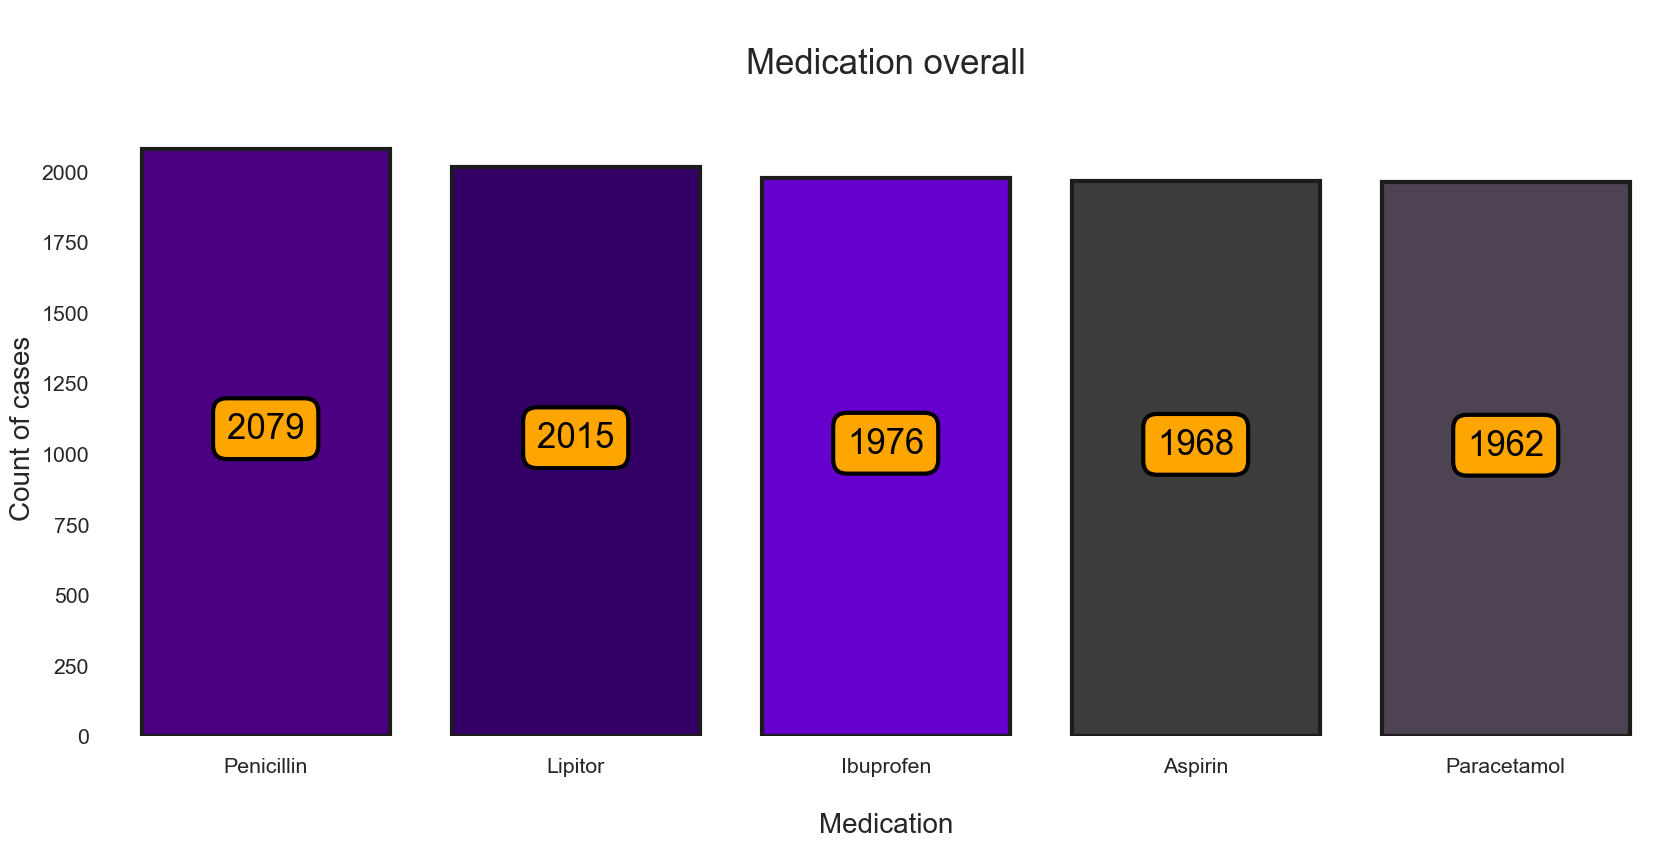

In [36]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Medication"], order=df["Medication"].value_counts(
).index, palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=3)
p.axes.set_title("\nMedication overall\n", fontsize=25)
plt.ylabel("Count of cases", fontsize=20)
plt.xlabel("\nMedication", fontsize=20)
plt.xticks(rotation=0)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=10, size=25, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth": 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Text(0, 0.5, 'Total')

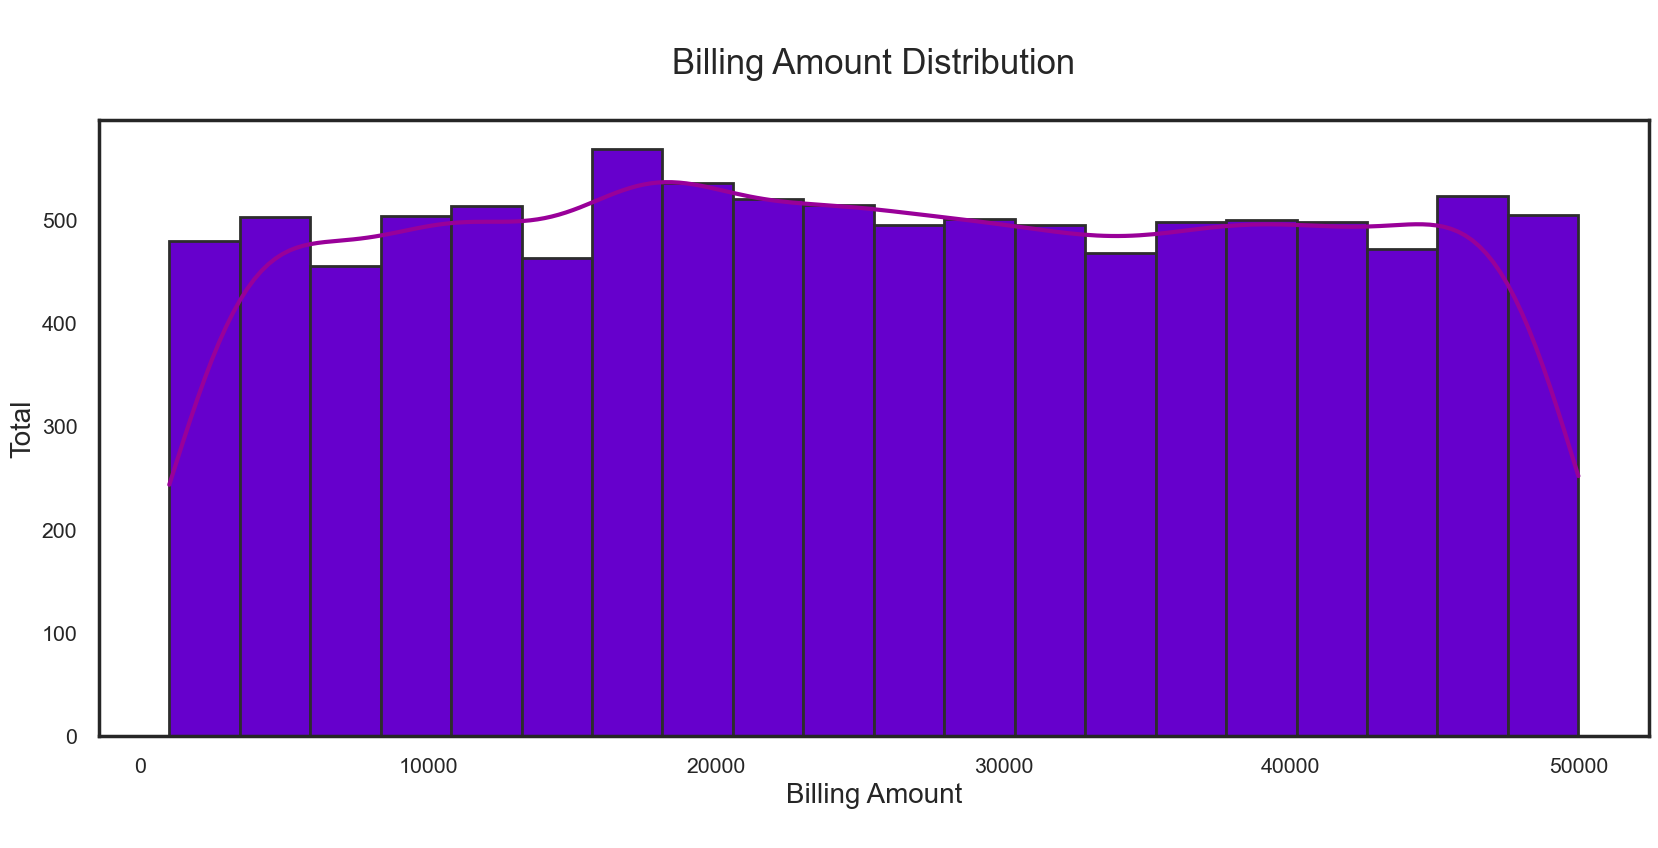

In [37]:
df_temp1 = df.sort_values(["Billing Amount"], ascending=False)

_, axs = plt.subplots(figsize=(20, 8))

sns.histplot(df_temp1["Billing Amount"], color=palette[2],
             kde=True, bins=20, alpha=1, fill=True, edgecolor=palette[12])
axs.lines[0].set_color(palette[7])
axs.set_title("\nBilling Amount Distribution\n", fontsize=25)
axs.set_xlabel("Billing Amount\n", fontsize=20)
axs.set_ylabel("Total", fontsize=20)

<h2 style="color: #4B0082;">Digging Deeper</h2>


Text(0, 0.5, 'Total cases')

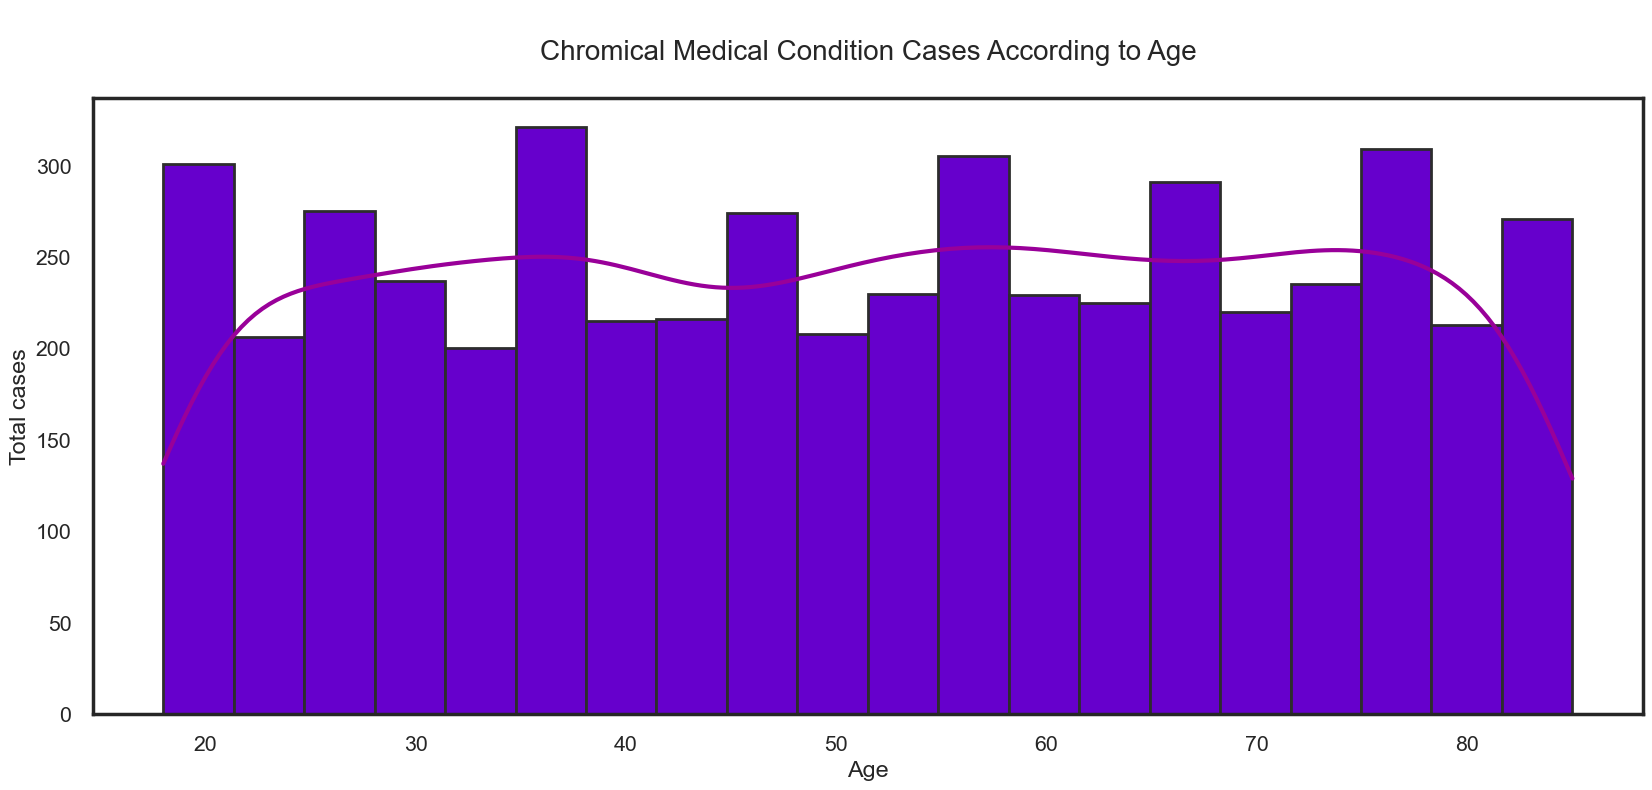

In [38]:
chronical = df["Medical Condition"].isin(["Asthma", "Diabetes", "Arthritis"])
_, axs = plt.subplots(figsize=(20, 8))
sns.histplot(df[chronical]["Age"], color=palette[2], kde=True,
             bins=20, alpha=1, fill=True, edgecolor=palette[12])
axs.lines[0].set_color(palette[7])
axs.set_title(
    "\nChromical Medical Condition Cases According to Age\n", fontsize=20)
axs.set_xlabel("Age")
axs.set_ylabel("Total cases")

Text(1038.4962121212118, 0.5, 'Total Cases')

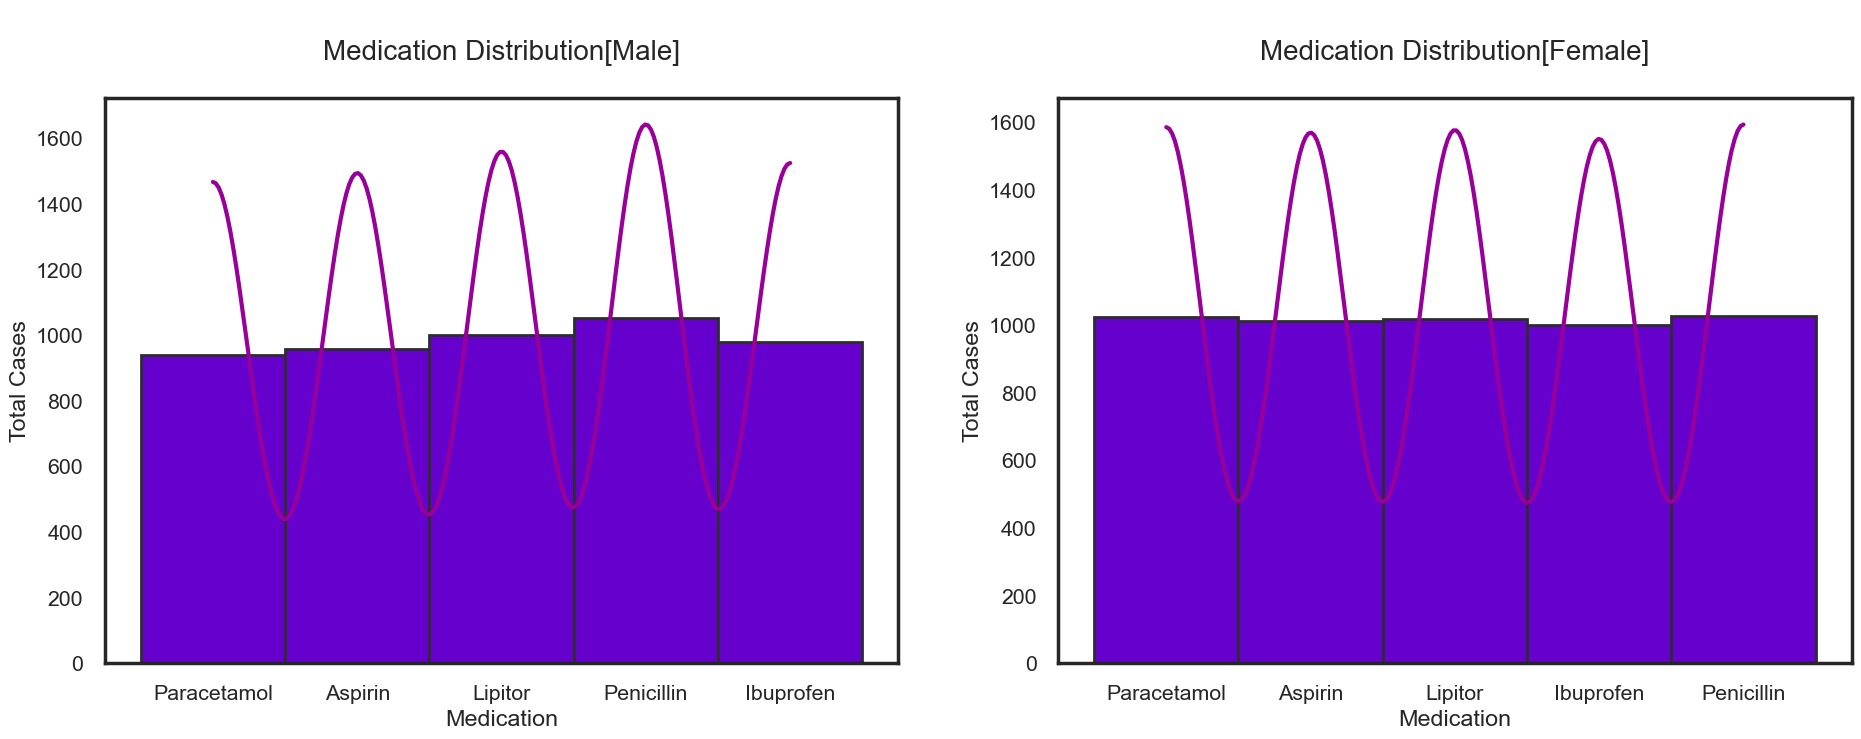

In [39]:
_, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=False, sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(df_temp1[df_temp1["Gender"] == "Male"]["Medication"], color=palette[2],
             kde=True, ax=axs[0], bins=20, alpha=1, fill=True, edgecolor=palette[12])
axs[0].lines[0].set_color(palette[7])
axs[0].set_title("\nMedication Distribution[Male]\n", fontsize=20)
axs[0].set_xlabel("Medication")
axs[0].set_ylabel("Total Cases")

sns.histplot(df_temp1[df_temp1["Gender"] == "Female"]["Medication"], color=palette[2],
             kde=True, ax=axs[1], bins=20, alpha=1, fill=True, edgecolor=palette[12])
axs[1].lines[0].set_color(palette[7])
axs[1].set_title("\nMedication Distribution[Female]\n", fontsize=20)
axs[1].set_xlabel("Medication")
axs[1].set_ylabel("Total Cases")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


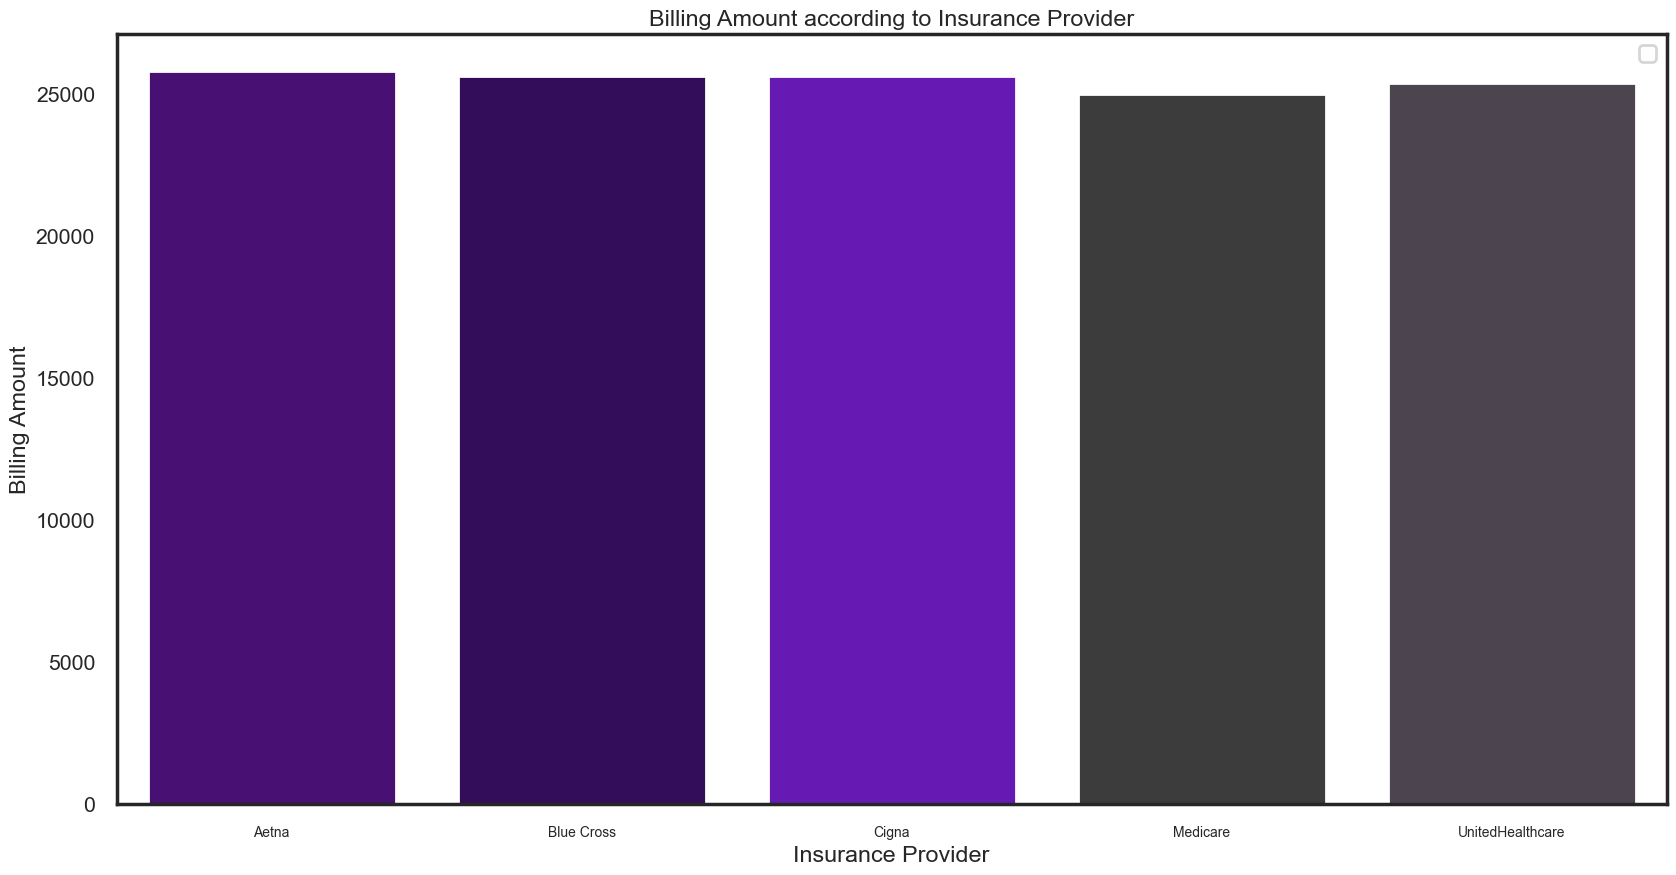

In [40]:
df1 = df.groupby(['Insurance Provider'])[
    ['Billing Amount']].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x=df1['Insurance Provider'],
            y=df1['Billing Amount'], palette=palette)
plt.title("Billing Amount according to Insurance Provider")
plt.legend(loc='upper right')
plt.ylabel("Billing Amount")
plt.xticks(rotation=0, fontsize=10)
plt.show()

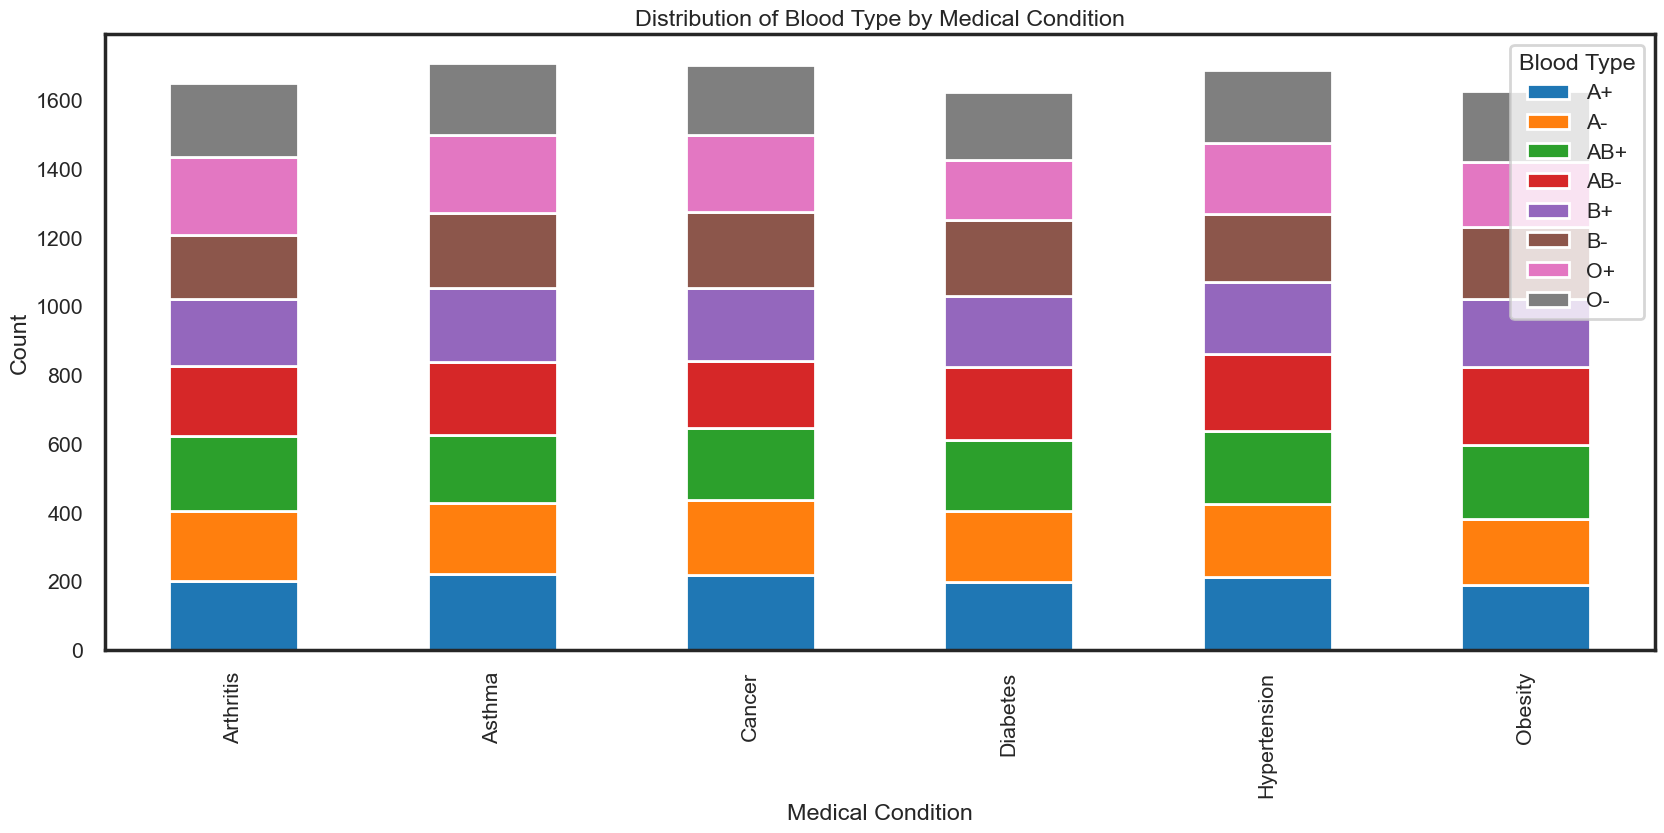

In [41]:
df_temp2 = df.groupby(['Medical Condition', 'Blood Type']).size().unstack()

df_temp2.plot(kind='bar', stacked=True, figsize=(20, 8))

plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Distribution of Blood Type by Medical Condition')

plt.show()

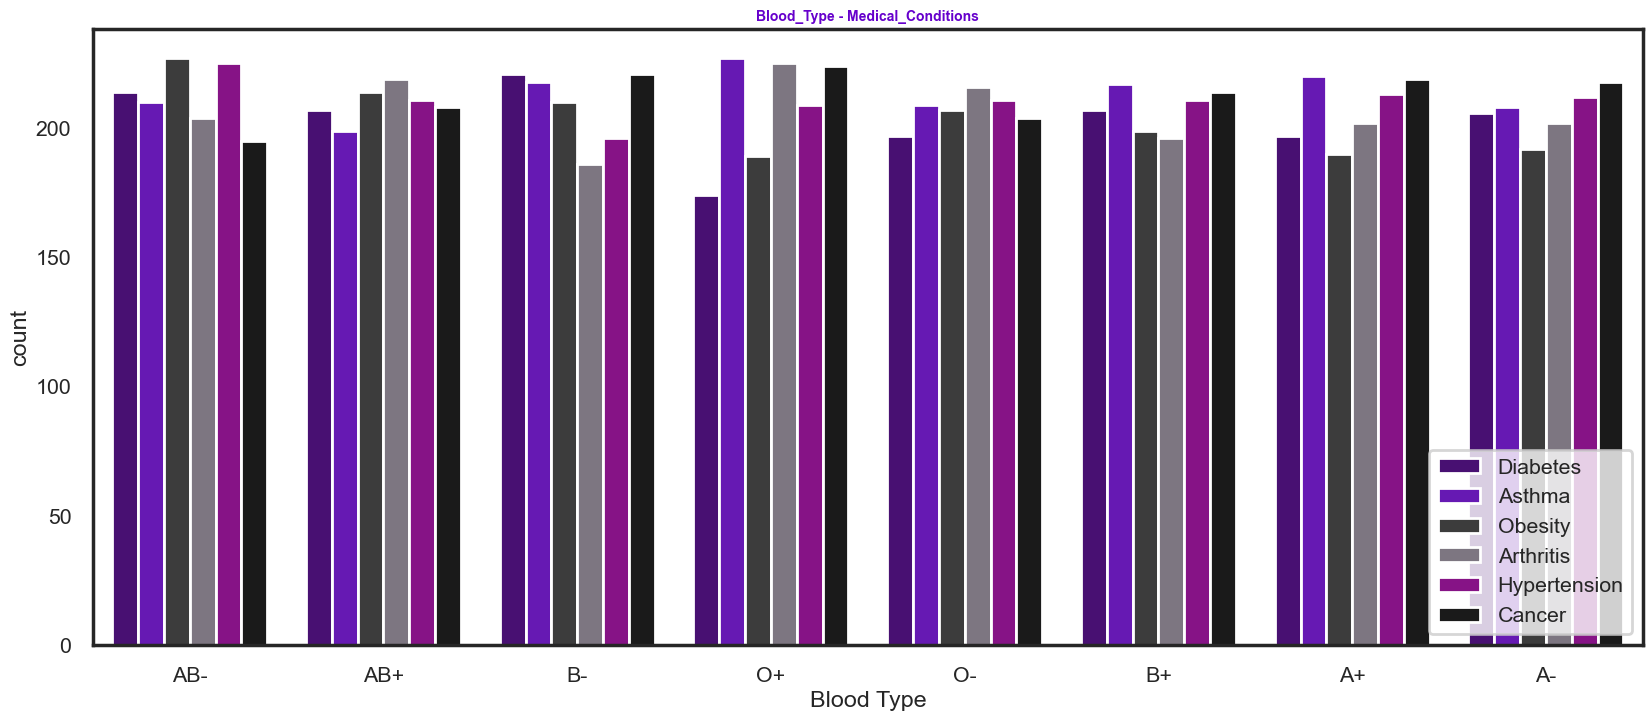

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(df, x="Blood Type", hue=df['Medical Condition'], ax=ax, order=df['Blood Type'].value_counts(
).index, palette=[palette[0], palette[2], palette[3], palette[6], palette[7], palette[9]])
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text='',
                xy=(rect.get_x()+rect.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                color="black")
ax.set_title("Blood_Type - Medical_Conditions", fontsize=10,
             fontweight="bold", color="#6600CC")
fig.show()

In [47]:
def blood_medical():
    return df.groupby(['Blood Type', 'Medical Condition']).size().unstack()

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Blood Type,,,,,,
A+,202,220,219,197,213,190
A-,202,208,218,206,212,192
AB+,219,199,208,207,211,214
AB-,204,210,195,214,225,227
B+,196,217,214,207,211,199
B-,186,218,221,221,196,210
O+,225,227,224,174,209,189
O-,216,209,204,197,211,207
